<h1 align="center">Rainfall Predict with LSTM and LSTM Attention </h1>



In [8]:
!pip install -U scikit-learn
!pip install tensorflow
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.17.0rc0)
ERROR: No matching distribution found for tensorflow==2.15

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl (2.5 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import the library needed

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Attention, Add, Concatenate, Input, Layer
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.regularizers import l2
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import sklearn
import seaborn as sns

In [ ]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Scikit-learn version: 1.5.0
TensorFlow version: 2.16.1
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


Read data

In [ ]:
# Membaca data keseluruhan

#Skenario 1
# rainfall_data_url = "https://raw.githubusercontent.com/arifian853/rainfall-predict-lstm-attention/master/dataset/filled/scenario3/final/final-data-2019-2023.csv"

# Skenario 2
# rainfall_data_url = "https://raw.githubusercontent.com/arifian853/rainfall-predict-lstm-attention/master/dataset/filled/scenario3/final/final-data-2014-2024.csv"

# Skenario 3
# rainfall_data_url = "https://raw.githubusercontent.com/arifian853/rainfall-predict-lstm-attention/master/dataset/filled/scenario3/final/final-data-2013-2024.csv"

# # Skenario 4
rainfall_data_url = "https://raw.githubusercontent.com/arifian853/rainfall-predict-lstm-attention/master/dataset/filled/scenario3/final/final-data-2010-2024.csv"

# # Skenario 5
# rainfall_data_url =
# # Skenario 6
# rainfall_data_url =

df = pd.read_csv(rainfall_data_url, parse_dates=['Tanggal'], index_col='Tanggal')

print('Dataset : \n', df.head())
print('Dataset : \n', df.tail())
print('\n')

# Menghitung jumlah hari dalam dataset
days_count = len(df.index)
print("Jumlah hari dalam dataset:", days_count)




Dataset : 
               Tn    Tx  Tavg  RH_avg   RR   ss  ff_x  ddd_x  ff_avg ddd_car
Tanggal                                                                    
01-01-2010  25.0  31.4  27.1    85.0  0.0  7.3   6.0   45.0     2.0      NE
02-01-2010  25.0  30.8  26.9    86.0  0.0  5.4   5.0   45.0     2.0      NE
03-01-2010  24.0  31.2  27.4    86.0  0.0  4.0   7.0   45.0     3.0      E 
04-01-2010  24.0  27.8  25.9    85.0  0.0  0.0   4.0  270.0     2.0      W 
05-01-2010  25.0  31.0  27.0    84.0  0.0  4.4   6.0   90.0     3.0      NE
Dataset : 
               Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg ddd_car
Tanggal                                                                     
27-05-2024  26.6  33.4  29.7    82.0   0.0  1.8   5.0  140.0     2.0      S 
28-05-2024  27.7  33.4  29.0    87.0   0.0  2.7   5.0  170.0     2.0      S 
29-05-2024  25.7  34.0  29.3    83.0  20.6  2.8   5.0  200.0     2.0      C 
30-05-2024  26.9  31.2  28.3    85.0  20.6  6.1   7.0  210.

Correlation matrix


 Correlation Matrix 



<Axes: >

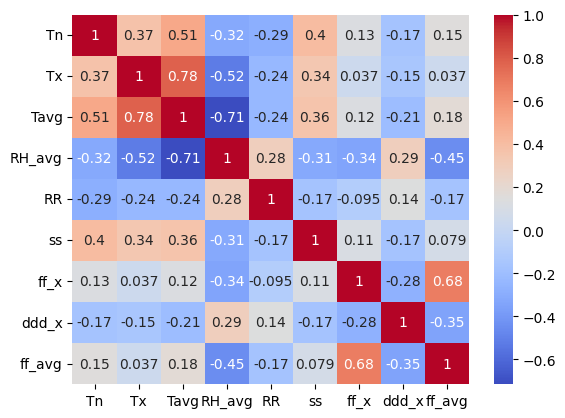

In [ ]:
print("\n Correlation Matrix \n")

matrix = df.drop(columns=['ddd_car']).corr()
# matrix = df.corr()
#plotting correlation matrix
sns.heatmap(matrix, cmap="coolwarm", annot=True)


Split data to train, test, and validate

In [ ]:
# Membagi data menjadi training, validation, dan testing sets


# Scenario 1 - 70:15:15
# train = df['01-01-2019':'28-02-2022']
# validation = df['01-03-2022':'28-02-2023']
# test = df['01-03-2023':'31-12-2023']

# Scenario 2 - 70:15:15
# train = df['01/01/2014':'15/04/2021']
# validation = df['16/04/2021':'06/11/2022']
# test = df['07/11/2022':'31/05/2024']

# Scenario 2 - 80:10:10
# train = df['01/01/2014':'01/05/2022']
# validation = df['02/05/2022':'16/05/2023']
# test = df['17/05/2023':'31/05/2024']

# # Scenario 3 - 70:15:15
# train = df['01-01-2013':'15-04-2020']
# validation = df['16-04-2020':'05-11-2021']
# test = df['06-11-2021':'31-05-2024']

# Scenario 3 - 80:10:10
# train = df['01-01-2013':'30-04-2021']
# validation = df['01-05-2021':'14-12-2022']
# test = df['15-12-2022':'31-05-2024']

# # Scenario 4 - 70:15:15
# train = df['01-01-2010': '02-02-2020']
# validation = df['03-02-2020' : '01-04-2022']
# test = df['02-04-2022' : '31-05-2024']

# Scenario 4 - 80:10:10
train = df['01-01-2010': '13-07-2021']
validation = df['14-07-2021' : '21-12-2022']
test = df['22-12-2022' : '31-05-2024']

# Displaying the number of records in each set
print(f'Training set: {train.shape[0]} records')
print(f'Validation set: {validation.shape[0]} records')
print(f'Test set: {test.shape[0]} records')

# Selecting features and target
features = ['Tavg', 'RH_avg', 'ss', 'ff_avg']
X_train = train[features]
y_train = train['RR']
X_val = validation[features]
y_val = validation['RR']
X_test = test[features]
y_test = test['RR']

Training set: 4212 records
Validation set: 526 records
Test set: 527 records


Normalization and convert to sequence the data

In [7]:
# # Normalisasi Fitur, tapi tidak target
# scaler = MinMaxScaler()

# # Fit and transform on training set, transform on validation and test sets
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # Print or inspect scaled values
# # Print or inspect scaled values
# print("Scaled X_train: \n", X_train_scaled)
# print("Scaled X_val: \n", X_val_scaled)
# print("Scaled X_test: \n", X_test_scaled)

# # Fungsi untuk membentuk data menjadi sequence
# def create_sequences(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X[i:(i + time_steps)])
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# time_steps = 10  # Misalnya, gunakan 10 hari sebelumnya untuk memprediksi hari berikutnya
# X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, time_steps)
# X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val.values, time_steps)
# X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

In [ ]:
# Normalisasi data Fitur dan target
scaler = MinMaxScaler()

# Reshape y_train, y_val, y_test to (n_samples, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_val_reshaped = y_val.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit and transform on training set, transform on validation and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train_reshaped).flatten()
y_val_scaled = scaler.transform(y_val_reshaped).flatten()
y_test_scaled = scaler.transform(y_test_reshaped).flatten()

# Print or inspect scaled values
print("Scaled X_train: \n", X_train_scaled)
print("Scaled X_val: \n", X_val_scaled)
print("Scaled X_test: \n", X_test_scaled)

# print("\n =============== \n")

print("Scaled y_train: \n", y_train.values)
print("Scaled y_val: \n",  y_train.values)
print("Scaled y_test: \n",  y_train.values)


# Fungsi untuk membentuk data menjadi sequence
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # Misalnya, gunakan 10 hari sebelumnya untuk memprediksi hari berikutnya
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)

Scaled X_train: 
 [[0.55263158 0.58823529 0.64035088 0.25      ]
 [0.52631579 0.61764706 0.47368421 0.25      ]
 [0.59210526 0.61764706 0.35087719 0.375     ]
 ...
 [0.44736842 0.70588235 0.60526316 0.25      ]
 [0.53947368 0.58823529 0.07017544 0.375     ]
 [0.28947368 0.73529412 0.48245614 0.5       ]]
Scaled X_val: 
 [[0.46052632 0.58823529 0.         0.125     ]
 [0.59210526 0.55882353 0.         0.25      ]
 [0.78947368 0.47058824 0.80701754 0.375     ]
 ...
 [0.38157895 0.73529412 0.38596491 0.375     ]
 [0.52631579 0.61764706 0.21929825 0.375     ]
 [0.55263158 0.61764706 0.6754386  0.375     ]]
Scaled X_test: 
 [[0.42105263 0.61764706 0.65789474 0.5       ]
 [0.44736842 0.55882353 0.07894737 0.375     ]
 [0.60526316 0.23529412 0.0877193  0.625     ]
 ...
 [0.84210526 0.52941176 0.24561404 0.25      ]
 [0.71052632 0.58823529 0.53508772 0.25      ]
 [0.69736842 0.61764706 0.53508772 0.25      ]]
Scaled y_train: 
 [ 0.   0.   0.  ... 22.5 22.5 22.5]
Scaled y_val: 
 [ 0.   0.   0. 

Data shape verification

In [ ]:
# Verifikasi bentuk data
print("Shape of X_train_seq:", X_train_seq.shape)
print("Shape of y_train_seq:", y_train_seq.shape)
print("Shape of X_val_seq:", X_val_seq.shape)
print("Shape of y_val_seq:", y_val_seq.shape)
print("Shape of X_test_seq:", X_test_seq.shape)
print("Shape of y_test_seq:", y_test_seq.shape)

Shape of X_train_seq: (4202, 10, 4)
Shape of y_train_seq: (4202,)
Shape of X_val_seq: (516, 10, 4)
Shape of y_val_seq: (516,)
Shape of X_test_seq: (517, 10, 4)
Shape of y_test_seq: (517,)


### Regular LSTM model build and training

In [ ]:
# Membangun model LSTM biasa
def build_lstm_model(input_shape, units=128, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(units, activation='tanh', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(units, activation='tanh', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(units, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Membangun model LSTM
input_shape = (time_steps, X_train_seq.shape[2])
model_lstm = build_lstm_model(input_shape)

# Displaying model summary
model_lstm.summary()

history_lstm = model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, verbose=2, validation_data=(X_val_seq, y_val_seq))

# Evaluasi model LSTM
y_pred_lstm = model_lstm.predict(X_test_seq)

def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n
    return mse

def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(n)) / n
    return mae

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

def r2_score(y_true, y_pred):
    mean_y_true = sum(y_true) / len(y_true)
    ss_tot = sum((y - mean_y_true) ** 2 for y in y_true)
    ss_res = sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true)))
    r2 = 1 - (ss_res / ss_tot)
    return r2

mse_lstm = mean_squared_error(y_test_seq, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test_seq, y_pred_lstm)
rmse_lstm = root_mean_squared_error(y_test_seq, y_pred_lstm)
r2_lstm = r2_score(y_test_seq, y_pred_lstm)

print(" \n ===================================================== \n")
print(f'R-squared LSTM: {r2_lstm}')
print(f'MSE LSTM: {mse_lstm}')
print(f'MAE LSTM: {mae_lstm}')
print(f'RMSE LSTM: {rmse_lstm}')
print(" \n ===================================================== \n")


c:\Users\arifi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 10, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,393 (1.26 MB)

 Trainable params: 331,393 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
132/132 - 10s - 75ms/step - loss: 0.0163 - val_loss: 0.0029
Epoch 2/100
132/132 - 2s - 13ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 3/100
132/132 - 2s - 13ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 4/100
132/132 - 2s - 16ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 5/100
132/132 - 3s - 25ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/100
132/132 - 4s - 28ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/100
132/132 - 2s - 18ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 8/100
132/132 - 3s - 20ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/100
132/132 - 3s - 23ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 10/100
132/132 - 2s - 14ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 11/100
132/132 - 2s - 14ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/100
132/132 - 2s - 14ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 13/100
132/132 - 2s - 12ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 14/100
132/132 - 2s - 12ms/step - loss: 0.0026 - val_loss: 0.0027


### 1 LSTM Attention Mechanism model build and training

In [ ]:
# Fungsi untuk membuat model LSTM dengan Attention Mechanism
def build_lstm_attention_model(input_shape, lstm_units=128, learning_rate=0.01):
      inputs = Input(shape=input_shape)

      lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
      lstm_out = (lstm_out)

      lstm_out1 = LSTM(lstm_units, return_sequences=True)(inputs)
      lstm_out1 = (lstm_out)

      lstm_out2 = LSTM(lstm_units, return_sequences=True)(inputs)
      lstm_out2 = (lstm_out)

      attention = Attention()([lstm_out, lstm_out])
      context_vector = Add()([lstm_out, attention])

      context_vector = LSTM(lstm_units, activation='tanh')(context_vector)
      context_vector = (context_vector)

      outputs = Dense(1)(context_vector)
      model = Model(inputs, outputs)
      optimizer = Adam(learning_rate=learning_rate)
      model.compile(optimizer=optimizer, loss='mse')

      return model

# Membangun model LSTM dengan Attention Mechanism
input_shape = (time_steps, X_train_seq.shape[2])
model_lstm_attention = build_lstm_attention_model(input_shape)

# Displaying model summary
model_lstm_attention.summary()

history_lstm_attention = model_lstm_attention.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32 ,verbose=2, validation_data=(X_val_seq, y_val_seq))

# Evaluasi model LSTM dengan Attention Mechanism
y_pred_lstm_attention = model_lstm_attention.predict(X_test_seq)

def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n
    return mse

def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(n)) / n
    return mae

def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

def r2_score(y_true, y_pred):
    mean_y_true = sum(y_true) / len(y_true)
    ss_tot = sum((y - mean_y_true) ** 2 for y in y_true)
    ss_res = sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true)))
    r2 = 1 - (ss_res / ss_tot)
    return r2

mse_lstm_attention = mean_squared_error(y_test_seq, y_pred_lstm_attention)
mae_lstm_attention = mean_absolute_error(y_test_seq, y_pred_lstm_attention)
rmse_lstm_attention = root_mean_squared_error(y_test_seq, y_pred_lstm_attention)
r2_lstm_attention = r2_score(y_test_seq, y_pred_lstm_attention)

print(" \n ===================================================== \n")
print(f'R-squared LSTM with Attention: {r2_lstm_attention}')
print(f'MSE LSTM with Attention: {mse_lstm_attention}')
print(f'MAE LSTM with Attention: {mae_lstm_attention}')
print(f'RMSE LSTM with Attention: {rmse_lstm_attention}')
print(" \n ===================================================== \n")

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 10, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_25 (LSTM)      │ (None, 10, 128)   │     68,096 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_4         │ (None, 10, 128)   │          0 │ lstm_25[0][0],    │
│ (Attention)         │                   │            │ lstm_25[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 10, 128)   │          0 │ lstm_25[0][0],    │
│                     │                   │            │ attention_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_28 (LSTM)      │ (None, 128)       │    131,584 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        129 │ lstm_28[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 199,809 (780.50 KB)

 Trainable params: 199,809 (780.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
132/132 - 13s - 101ms/step - loss: 0.0792 - val_loss: 0.0031
Epoch 2/100
132/132 - 3s - 19ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 3/100
132/132 - 3s - 20ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 4/100
132/132 - 2s - 18ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 5/100
132/132 - 2s - 12ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 6/100
132/132 - 2s - 15ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 7/100
132/132 - 2s - 15ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/100
132/132 - 1s - 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/100
132/132 - 1s - 9ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 10/100
132/132 - 1s - 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 11/100
132/132 - 1s - 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 12/100
132/132 - 1s - 9ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 13/100
132/132 - 1s - 10ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 14/100
132/132 - 1s - 9ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch

Result and evaluation

In [7]:
# Plot hasil pelatihan
plt.figure(figsize=(16, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss LSTM')
plt.plot(history_lstm_attention.history['loss'], label='Training Loss LSTM with Attention')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss LSTM')
plt.plot(history_lstm_attention.history['val_loss'], label='Validation Loss LSTM with Attention')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Menampilkan hasil evaluasi
print(f'R-squared LSTM: {r2_lstm}')
print(f'MSE LSTM: {mse_lstm}')
print(f'MAE LSTM: {mae_lstm}')
print(f'RMSE LSTM : {rmse_lstm}')
print(f'R-squared LSTM with Attention: {r2_lstm_attention}')
print(f'MSE LSTM with Attention: {mse_lstm_attention}')
print(f'MAE LSTM with Attention: {mae_lstm_attention}')
print(f'RMSE LSTM with Attention: {rmse_lstm_attention}')


NameError: name 'plt' is not defined

Nilai prediksi dan nilai asli LSTM Regular

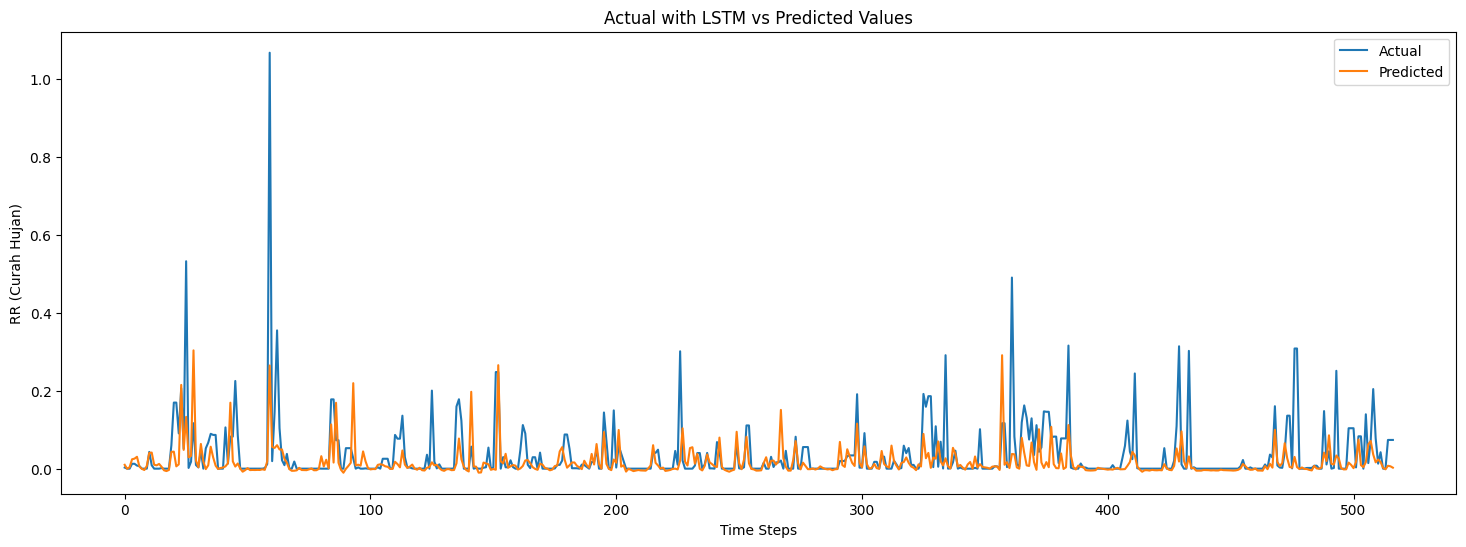

In [40]:
# Plot prediksi vs nilai sebenarnya LSTM Reguler
plt.figure(figsize=(18, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred_lstm, label='Predicted')
plt.title('Actual with LSTM vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('RR (Curah Hujan)')
plt.legend()
plt.show()

Nilai prediksi dan nilai asli LSTM Attention

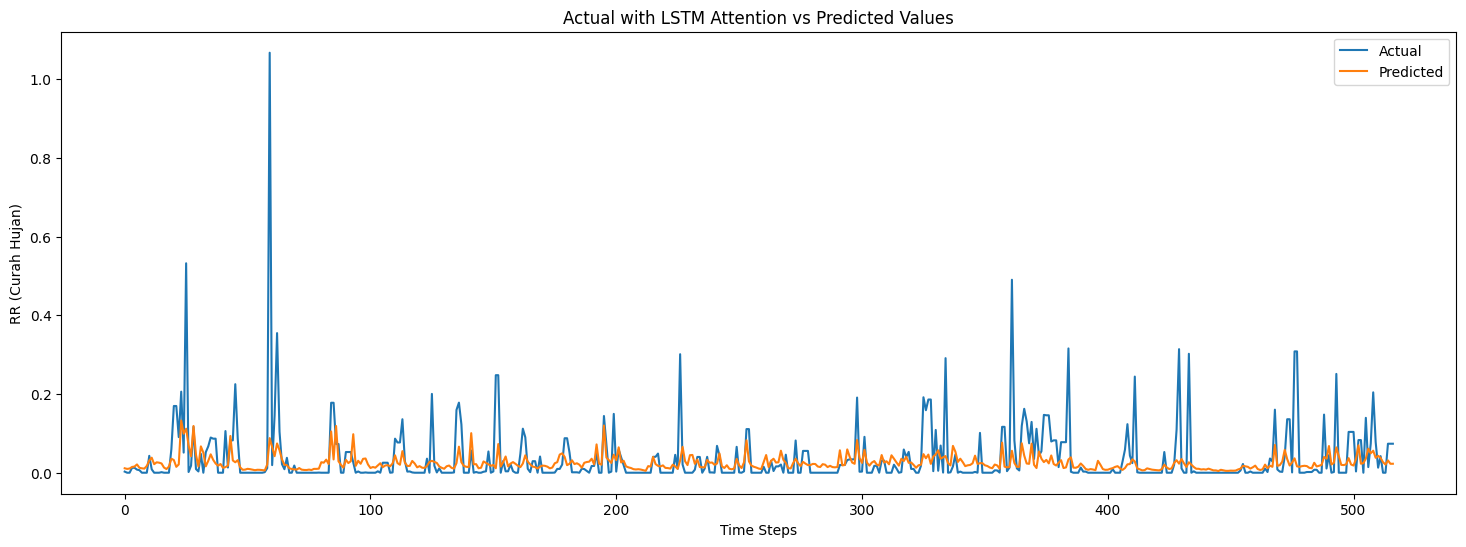

In [44]:
# Plot prediksi vs nilai sebenarnya LSTM Attention

# Mengembalikan ke nilai asli
plt.figure(figsize=(18, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(y_pred_lstm_attention, label='Predicted')
plt.title('Actual with LSTM Attention vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('RR (Curah Hujan)')
plt.legend()
plt.show()

Save the model

In [3]:
# Simpan model
tf.saved_model.save(model_lstm, '/models/saved_model_lstm')
tf.saved_model.save(model_lstm_attention, '/models/saved_model_lstm_attention')

NameError: name 'tf' is not defined

In [ ]:
# Zip model agar mudah di download
!zip -r /content/saved_model_lstm.zip /content/saved_model_lstm
!zip -r /content/saved_model_lstm_attention.zip /content/saved_model_lstm_attention

  adding: content/saved_model_lstm/ (stored 0%)
  adding: content/saved_model_lstm/assets/ (stored 0%)
  adding: content/saved_model_lstm/variables/ (stored 0%)
  adding: content/saved_model_lstm/variables/variables.index (deflated 64%)
  adding: content/saved_model_lstm/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/saved_model_lstm/saved_model.pb (deflated 90%)
  adding: content/saved_model_lstm/fingerprint.pb (stored 0%)
  adding: content/saved_model_lstm_attention/ (stored 0%)
  adding: content/saved_model_lstm_attention/assets/ (stored 0%)
  adding: content/saved_model_lstm_attention/variables/ (stored 0%)
  adding: content/saved_model_lstm_attention/variables/variables.index (deflated 62%)
  adding: content/saved_model_lstm_attention/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/saved_model_lstm_attention/saved_model.pb (deflated 90%)
  adding: content/saved_model_lstm_attention/fingerprint.pb (stored 0%)
